<a href="https://colab.research.google.com/github/Elwing-Chou/tiba0619/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# pandas型態: 1.DataFrame(2-D) 2. Series(1-D)
import pandas as pd
from sklearn.datasets import load_diabetes
diabetes = load_diabetes(scaled=False)
df = pd.DataFrame(diabetes["data"], columns=diabetes["feature_names"])
# 存成別的形式, df.to_csv
df["ans"] = diabetes["target"]
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,ans
0,59.0,2.0,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,60.0,2.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0,178.0
438,47.0,2.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0,104.0
439,60.0,2.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0,132.0
440,36.0,1.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0,220.0


機器學習: 1k~1w

深度學習: 1w~10w

參考問題難度(欄位多寡):

1. 問題簡單: 需要比較少資料

2. 問題困難: 需要比較多資料

In [3]:
# 把資料分成兩部分 一部分叫做訓練資料 一部分叫做驗證資料
import numpy as np
from sklearn.model_selection import train_test_split
# train_test_split([1, 2, 3, 4],
#          [5, 6, 7, 8],
#          [9, 10, 11, 12],
#          test_size=0.25)
# !!! 在妳進到機器學習的流程, 不要再是dataframe, 請妳都把她轉成 numpy array
x = df.drop("ans", axis=1)
y = df["ans"]
x = np.array(x)
y = np.array(y)
# [x part1(90%), x part2, y part1, y part2]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(397, 10)
(45, 10)
(397,)
(45,)


In [4]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=2)
# fit: 訓練
reg.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=2)

[Text(0.5, 0.8333333333333334, 's5 <= 4.6\nsquared_error = 5946.931\nsamples = 397\nvalue = 151.874'),
 Text(0.25, 0.5, 'bmi <= 26.95\nsquared_error = 2973.881\nsamples = 198\nvalue = 108.429'),
 Text(0.125, 0.16666666666666666, 'squared_error = 2125.935\nsamples = 156\nvalue = 95.917'),
 Text(0.375, 0.16666666666666666, 'squared_error = 3381.896\nsamples = 42\nvalue = 154.905'),
 Text(0.75, 0.5, 'bmi <= 31.55\nsquared_error = 5158.553\nsamples = 199\nvalue = 195.101'),
 Text(0.625, 0.16666666666666666, 'squared_error = 4363.105\nsamples = 154\nvalue = 178.377'),
 Text(0.875, 0.16666666666666666, 'squared_error = 3648.0\nsamples = 45\nvalue = 252.333')]

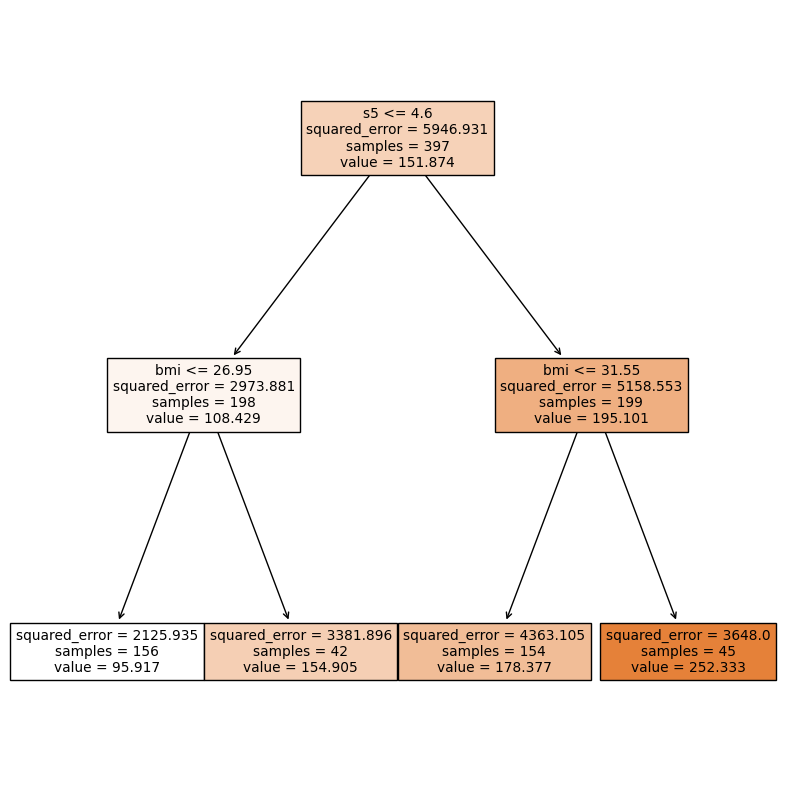

In [5]:
# matplotlib
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 10))
plot_tree(reg,
     feature_names=diabetes["feature_names"],
     filled=True)